# Forum Group Discussion MK Praktikum Unggulan (Praktikum DGX)
---
Forum Group Discussion ini dilaksanakan sebagai wadah diskusi peserta untuk mendalami materi yang berkaitan dengan MK Praktikum Unggulan (Praktikum DGX), guna mendukung pemahaman konsep, analisis permasalahan, serta penerapan materi sesuai dengan ruang lingkup program studi.

# Hands-On Prediksi Harga Tiket Pesawat
---
Hands-on ini bertujuan untuk membangun sebuah proyek machine learning yang mampu memprediksi harga tiket pesawat berdasarkan data historis penerbangan menggunakan algoritma Linear Regression. Informasi yang digunakan meliputi maskapai penerbangan, tanggal perjalanan, waktu keberangkatan, waktu kedatangan, durasi penerbangan, jumlah transit, serta jarak tempuh penerbangan. Proyek ini dirancang mengikuti metodologi CRISP-DM agar proses pengembangan model dilakukan secara sistematis, terstruktur, dan mudah dievaluasi.

## Tujuan Hands-On

Setelah menyelesaikan Hands-on ini, diharapkan peserta  dapat:

* Memahami dan menerapkan alur pengembangan proyek data science menggunakan metodologi CRISP-DM.
* Melakukan eksplorasi, pembersihan, dan transformasi data penerbangan secara sistematis dan terstruktur.
* Membangun dan mengevaluasi algoritma Linear Regression untuk prediksi harga tiket pesawat.
* Menganalisis performa model prediksi menggunakan metrik evaluasi regresi (MAE, RMSE, dan R²).

<a id='home'></a>
<h2>Daftar Isi</h2>

- <a href=#CRISP_DM>CRISP-DM</a>
- <a href=#Business>Business Understanding</a>
- <a href=#Understanding>Data Understanding</a>
- <a href=#Preparation>Data Preparation</a>
- <a href=#Modelling>Modelling</a>
- <a href=#Evaluation>Evaluation Model</a>
- <a href=#Deployment>Deployment</a>

<a id='CRISP_DM'></a>
# CRISP-DM
<hr>
Cross Industry Standard Process for Data Mining (CRISP-DM) merupakan metodologi yang digunakan dalam pengembangan proyek data mining dan machine learning. Metodologi ini terdiri dari enam tahapan utama, yaitu:

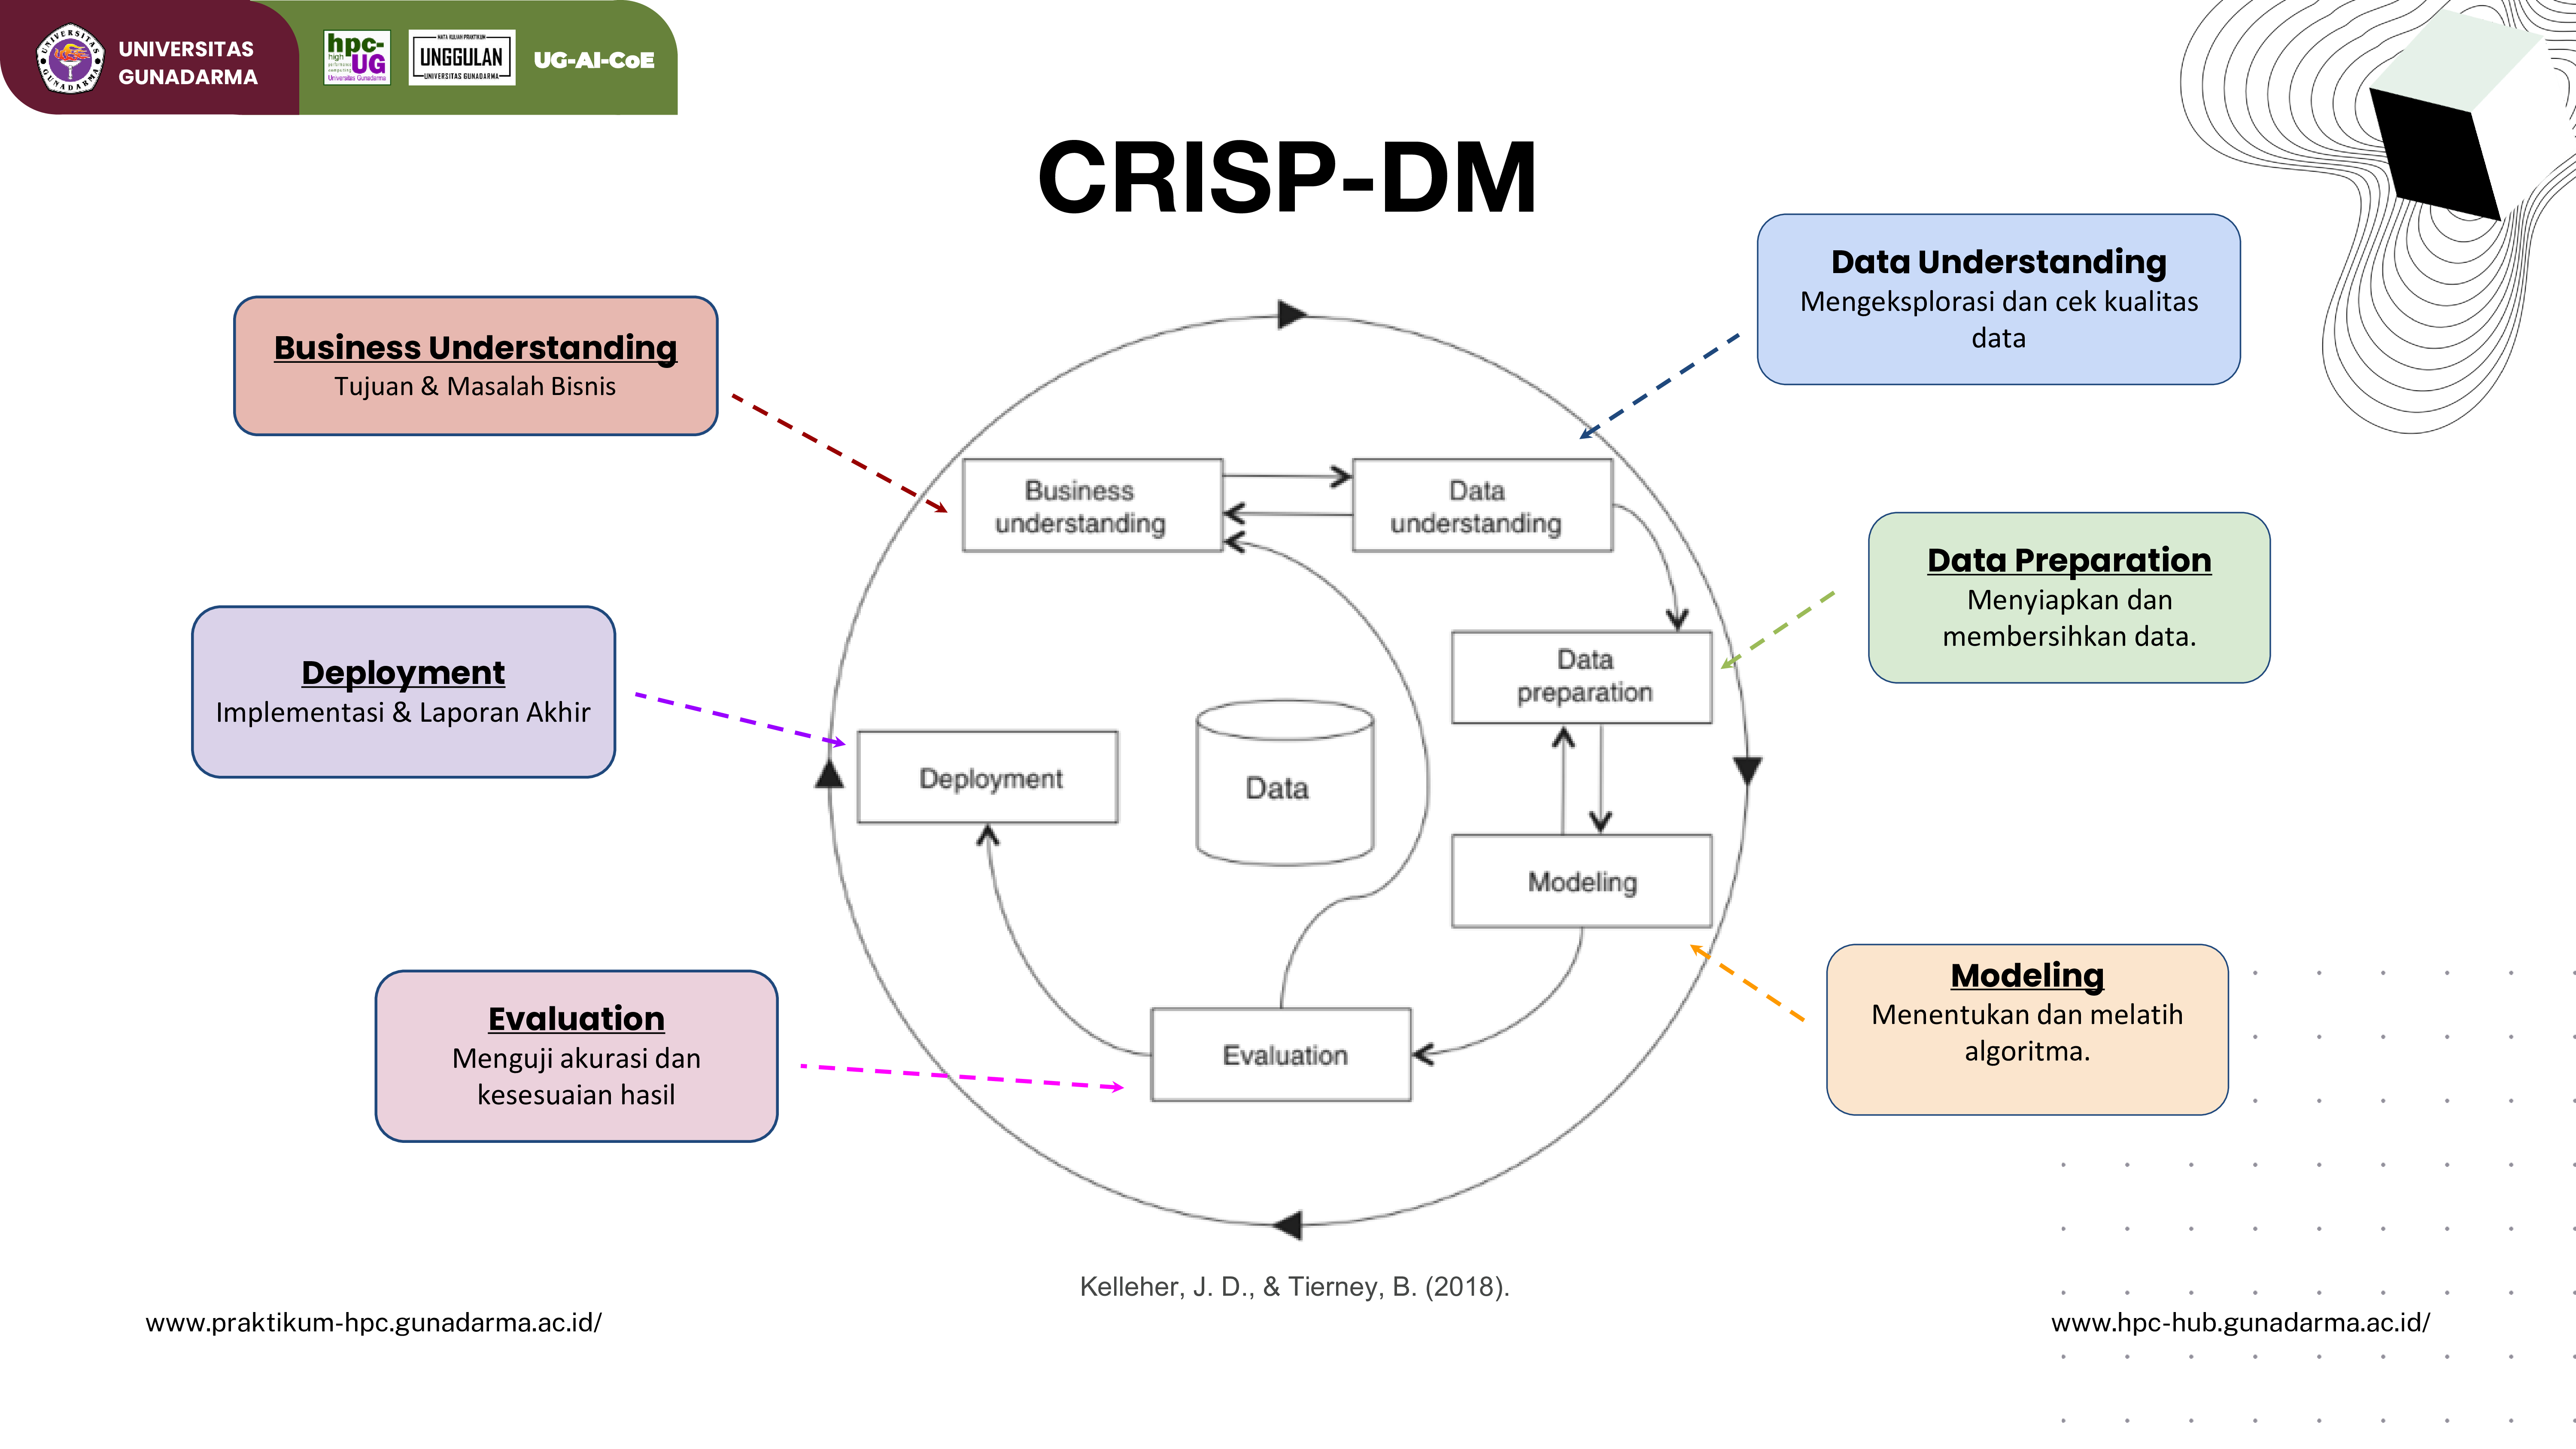

Setiap tahapan dalam CRISP-DM saling berkaitan dan bersifat iteratif, sehingga memungkinkan penyesuaian pada tahap sebelumnya apabila ditemukan kendala atau insight baru pada tahap selanjutnya.

<a id='Business'></a>
# Business Understanding
<hr>

## Latar Belakang
Industri penerbangan merupakan salah satu sektor transportasi dengan tingkat persaingan yang tinggi dan karakteristik harga yang sangat dinamis. Harga tiket pesawat dapat berubah dalam waktu singkat akibat berbagai faktor, seperti maskapai penerbangan, waktu keberangkatan, jumlah transit, durasi penerbangan, serta jarak tempuh. Kondisi ini sering kali menyulitkan konsumen dalam menentukan waktu terbaik untuk membeli tiket dengan harga yang optimal.

Berdasarkan penelitian Biswas et al. (2022), pola penentuan harga tiket pesawat bersifat kompleks dan tidak selalu linear, sehingga metode machine learning dinilai lebih efektif dibandingkan pendekatan statistik konvensional dalam menangkap hubungan non-linear antar variabel. Oleh karena itu, pemanfaatan data historis penerbangan menjadi peluang untuk membangun sistem prediksi harga tiket pesawat yang lebih akurat dan informatif.

## Permasalahan
Permasalahan utama yang diangkat dalam proyek ini adalah:

* Ketidakpastian harga tiket pesawat yang menyulitkan konsumen dalam perencanaan perjalanan.
* Ketiadaan sistem prediksi harga yang mudah digunakan dan berbasis data historis penerbangan.
* Perlunya model prediksi yang mampu memberikan estimasi harga tiket secara akurat tanpa memerlukan konfigurasi model yang kompleks.

## Tujuan
Tujuan dari proyek ini adalah:
* Mengembangkan model prediksi harga tiket pesawat berbasis machine learning menggunakan algoritma Linear Regression.
* Menghasilkan estimasi harga tiket pesawat yang mendekati harga aktual.
* Mengimplementasikan model prediksi ke dalam dashboard interaktif berbasis web sehingga pengguna dapat memperoleh estimasi harga tiket pesawat secara mudah dan cepat berdasarkan input karakteristik penerbangan.

<a id='Understanding'></a>
# Data Understanding
<hr>
Tahap Data Understanding bertujuan untuk memahami karakteristik data yang digunakan, baik dari sisi struktur, kualitas, maupun pola awal dataset. Tahapan ini penting untuk memastikan data layak digunakan serta menentukan strategi data preparation dan pemodelan yang tepat.

## Dataset
Dataset yang digunakan merupakan dataset penerbangan domestik di Indonesia. Dataset ini merupakan hasil pembersihan data yang diperoleh dari Kaggle melalui tautan https://www.kaggle.com/datasets/muhammadbinimran/flight-price-prediction.


Dataset terdiri dari 10.683 baris data dan 9 atribut, dengan variabel target berupa Harga Tiket. Setiap baris merepresentasikan satu data penerbangan dengan informasi terkait maskapai, waktu perjalanan, durasi, jumlah transit, serta jarak tempuh.

Atribut Dataset:
* Maskapai: Nama maskapai penerbangan
* Tanggal_Perjalanan: Tanggal keberangkatan penerbangan
* Waktu_Berangkat: Waktu keberangkatan penerbangan
* Waktu_Tiba: Waktu kedatangan penerbangan
* Durasi_Penerbangan: Lama perjalanan penerbangan
* Jumlah_Transit: Jumlah transit (pemberhentian) selama perjalanan
* Informasi_Tambahan: Informasi tambahan terkait layanan penerbangan
* Jarak_Km: Jarak tempuh penerbangan (km)
* Harga_Tiket: Harga tiket pesawat (variabel target)

## Library
Library yang digunakan pada tahap ini meliputi library untuk manipulasi data, visualisasi, serta analisis statistik awal.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.mstats import winsorize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

* pandas: Digunakan untuk memuat, mengelola, dan memanipulasi data.
* numpy: Digunakan untuk operasi numerik dan perhitungan matematis pada data dan hasil prediksi.
* matplotlib: Digunakan untuk membuat visualisasi evaluasi model.
* seaborn: Digunakan untuk visualisasi eksploratif data seperti histogram dan boxplot.
* scipy.stats.mstats.winsorize: Digunakan untuk menangani outlier agar model lebih stabil.
* BaseEstimator & TransformerMixin: Digunakan untuk membangun custom transformer pada tahap feature engineering.
* train_test_split: Digunakan untuk membagi dataset menjadi data latih dan data uji.
* ColumnTransformer: Digunakan untuk menerapkan preprocessing berbeda pada fitur numerik dan kategorikal.
* OneHotEncoder: Digunakan untuk mengubah fitur kategorikal menjadi numerik.
* StandardScaler: Digunakan untuk menstandarkan fitur numerik agar memiliki skala yang seimbang.
* SimpleImputer: Digunakan untuk menangani missing value pada data numerik dan kategorikal.
* Pipeline: Digunakan untuk menggabungkan preprocessing dan model agar proses konsisten dan siap deployment.
* LinearRegression: Digunakan sebagai algoritma machine learning.
* mean_absolute_error, mean_squared_error, r2_score: Digunakan untuk mengevaluasi performa model.
* joblib: Digunakan untuk menyimpan dan memuat kembali model yang telah dilatih.

## Memuat Dataset
Dataset dimuat menggunakan library pandas sebagai tahap awal eksplorasi untuk memastikan data dapat digunakan pada proses analisis dan pemodelan.

In [2]:
data = pd.read_csv('/content/Data Penerbangan.csv')

In [3]:
data.head()

,Maskapai,Tanggal_Perjalanan,Waktu_Berangkat,Waktu_Tiba,Durasi_Penerbangan,Jumlah_Transit,Informasi_Tambahan,Jarak_Km,Harga_Tiket
0,Lion Air,24/03/2019,22:20,01:10 22 Mar,2h 50m,non-stop,No info,1739.802102,725232
1,Batik Air,1/05/2019,05:50,13:15,7h 25m,2 stops,No info,1560.696623,1425898
2,Garuda Indonesia,9/06/2019,09:25,04:25 10 Jun,19h,2 stops,No info,2089.267638,2583440
3,Lion Air,12/05/2019,18:05,23:30,5h 25m,1 stop,No info,1560.696623,1157170
4,Lion Air,01/03/2019,16:50,21:35,4h 45m,1 stop,No info,1739.802102,2475502


In [4]:
data.tail()

,Maskapai,Tanggal_Perjalanan,Waktu_Berangkat,Waktu_Tiba,Durasi_Penerbangan,Jumlah_Transit,Informasi_Tambahan,Jarak_Km,Harga_Tiket
10678,AirAsia Indonesia,9/04/2019,19:55,22:25,2h 30m,non-stop,No info,1560.696623,764313
10679,Batik Air,27/04/2019,20:45,23:20,2h 35m,non-stop,No info,1560.696623,771384
10680,Garuda Indonesia,27/04/2019,08:20,11:20,3h,non-stop,No info,1750.114762,1345317
10681,Sriwijaya Air,01/03/2019,11:30,14:10,2h 40m,non-stop,No info,1739.802102,2353793
10682,Batik Air,9/05/2019,10:55,19:15,8h 20m,2 stops,No info,2089.267638,2187233


Dataset merepresentasikan kombinasi faktor operasional (jadwal, durasi, transit, jarak) dan faktor layanan (maskapai dan informasi tambahan) sebagai penentu harga.

## Struktur dan Tipe Data
Untuk memahami struktur dataset, dilakukan pengecekan jumlah baris, kolom, serta tipe data masing-masing atribut.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Maskapai            10683 non-null  object 
 1   Tanggal_Perjalanan  10683 non-null  object 
 2   Waktu_Berangkat     10683 non-null  object 
 3   Waktu_Tiba          10683 non-null  object 
 4   Durasi_Penerbangan  10683 non-null  object 
 5   Jumlah_Transit      10682 non-null  object 
 6   Informasi_Tambahan  10683 non-null  object 
 7   Jarak_Km            10683 non-null  float64
 8   Harga_Tiket         10683 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 751.3+ KB


Dataset terdiri dari 10683 baris dan 9 atribut dengan sebagian besar atribut bertipe object, khususnya kolom tanggal, waktu, durasi, dan transit. Hal ini mengindikasikan perlunya proses transformasi data agar dapat digunakan dengan baik.

## Statistik Deskriptif
Analisis statistik deskriptif dilakukan untuk melihat sebaran nilai pada atribut numerik, khususnya pada variabel target.

In [6]:
data.describe()

,Jarak_Km,Harga_Tiket
count,10683.000000,1.068300e+04
mean,1754.736783,1.691103e+06
std,383.508655,8.581739e+05
min,621.462850,3.273500e+05
25%,1560.696623,9.820500e+05
50%,1750.114762,1.558029e+06
75%,2089.267638,2.302615e+06
max,2089.267638,1.479718e+07


Statistik deskriptif memberikan gambaran awal terkait nilai minimum, maksimum, rata-rata, serta sebaran harga tiket pesawat. Informasi ini berguna untuk mengidentifikasi potensi outlier dan memahami skala data.

## Nilai Kosong
Pemeriksaan nilai kosong (missing value) dilakukan untuk menilai kualitas data, karena nilai kosong yang banyak dapat menurunkan akurasi model dan mengganggu proses pelatihan.

In [7]:
data.isnull().sum()

,0
Maskapai,0
Tanggal_Perjalanan,0
Waktu_Berangkat,0
Waktu_Tiba,0
Durasi_Penerbangan,0
Jumlah_Transit,1
Informasi_Tambahan,0
Jarak_Km,0
Harga_Tiket,0


Missing value yang minim mengindikasikan kualitas data cukup baik dan tidak mengganggu pelatihan model secara signifikan.

## Data Duplikat
Pengecekan jumlah data duplikat perlu dilakukan untuk memastikan tidak ada data berulang yang berpotensi menimbulkan bias.

In [8]:
data.duplicated().sum()

np.int64(220)

Hasil menunjukkan adanya 220 data duplikat, sehingga perlu dilakukan penghapusan untuk mencegah model menghafal pola data berulang yang dapat membuat evaluasi terlihat lebih baik dari kondisi sebenarnya.

## Matriks Korelasi
Analisis korelasi dilakukan untuk melihat hubungan antar fitur numerik dengan variabel target.

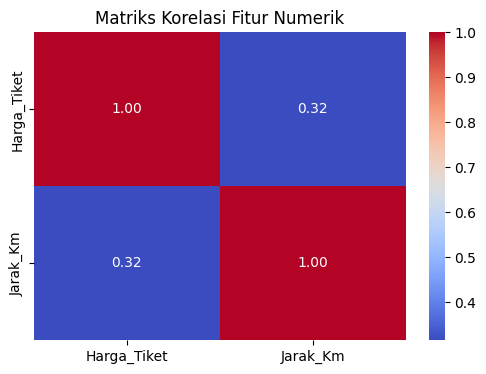

In [9]:
plt.figure(figsize=(6,4))
sns.heatmap(
    data[["Harga_Tiket", "Jarak_Km"]].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Matriks Korelasi Fitur Numerik")
plt.show()

Karena sebagian besar fitur masih berbentuk kategorikal atau teks pada tahap ini, analisis korelasi terbatas pada fitur numerik yang tersedia. Hasil menunjukkan bahwa jarak memiliki korelasi positif terhadap harga tiket, yang mencerminkan bahwa penerbangan jarak jauh cenderung memiliki harga lebih tinggi.

## Analisis Univariate
Analisis univariate bertujuan untuk memahami distribusi masing-masing variabel secara individual.

### Distribusi Harga Tiket
Visualisasi distribusi harga tiket dilakukan untuk melihat pola sebaran dan potensi outlier.

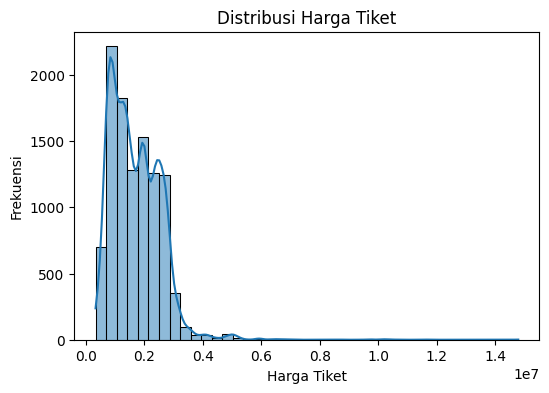

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(data["Harga_Tiket"], bins=40, kde=True)
plt.title("Distribusi Harga Tiket")
plt.xlabel("Harga Tiket")
plt.ylabel("Frekuensi")
plt.show()

Histogram digunakan untuk menggambarkan sebaran nilai harga tiket. Distribusi yang right-skewed menunjukkan bahwa sebagian besar tiket berada pada rentang harga menengah, dengan sejumlah kecil tiket berharga tinggi sebagai outlier. Hal ini mencerminkan karakteristik industri penerbangan yang memiliki variasi harga cukup besar.

## Analisis Bivariate dan Multivariate
Analisis bivariate dan multivariate dilakukan untuk melihat hubungan antara dua atau lebih variabel terhadap variabel target.

### Harga Tiket vs Jumlah Transit
Analisis hubungan antara harga tiket dan jumlah transit dilakukan menggunakan boxplot untuk melihat perbedaan distribusi harga tiket berdasarkan jumlah transit penerbangan.

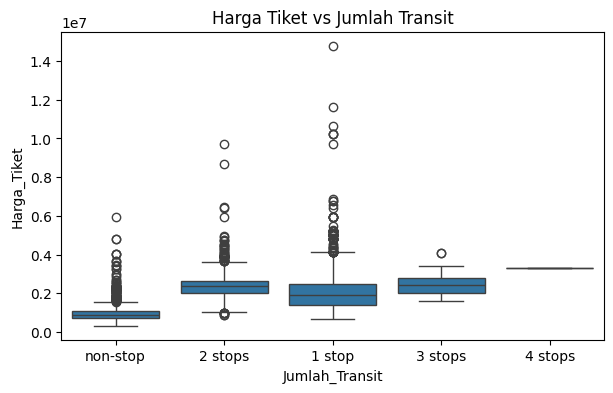

In [11]:
plt.figure(figsize=(7,4))
sns.boxplot(x="Jumlah_Transit", y="Harga_Tiket", data=data)
plt.title("Harga Tiket vs Jumlah Transit")
plt.show()

Boxplot digunakan untuk membandingkan distribusi harga tiket berdasarkan jumlah transit. Hasil visualisasi menunjukkan bahwa penerbangan dengan transit cenderung memiliki harga tiket yang lebih tinggi dibandingkan penerbangan non-stop, serta variasi harga yang lebih besar, terutama pada kategori transit tertentu.

### Harga Tiket vs Maskapai
Perbandingan harga tiket berdasarkan maskapai dilakukan untuk melihat perbedaan strategi harga antar maskapai.

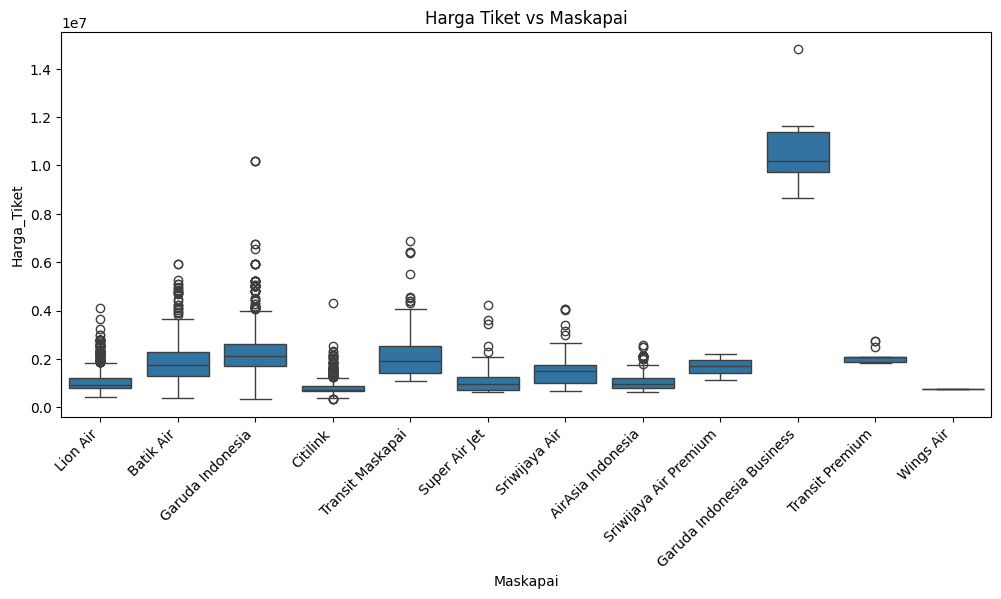

In [12]:
plt.figure(figsize=(12,5))
sns.boxplot(x="Maskapai", y="Harga_Tiket", data=data)
plt.xticks(rotation=45, ha="right")
plt.title("Harga Tiket vs Maskapai")
plt.show()

Hasil visualisasi menunjukkan adanya perbedaan distribusi harga antar maskapai, yang mengindikasikan bahwa atribut maskapai memiliki peran penting dalam pemodelan harga tiket.

### Analisis Multivariate (Harga, Transit, dan Maskapai)

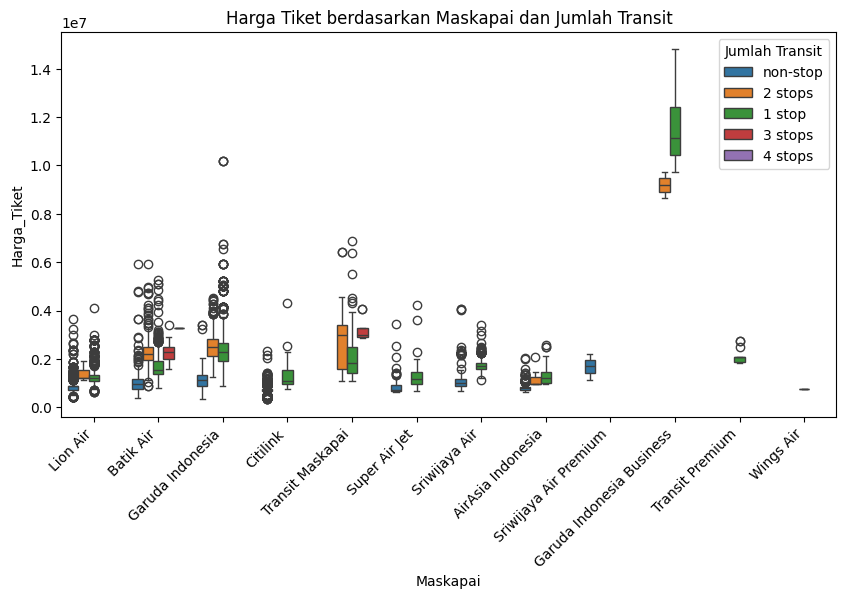

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(
    x="Maskapai",
    y="Harga_Tiket",
    hue="Jumlah_Transit",
    data=data
)
plt.xticks(rotation=45, ha="right")
plt.title("Harga Tiket berdasarkan Maskapai dan Jumlah Transit")
plt.legend(title="Jumlah Transit")
plt.show()

Analisis multivariate ini menunjukkan bahwa harga tiket dipengaruhi secara simultan oleh maskapai dan jumlah transit, di mana kombinasi maskapai dan kategori transit tertentu menghasilkan perbedaan harga yang signifikan.

Berdasarkan hasil Data Understanding ini, dapat disimpulkan bahwa dataset memiliki kualitas yang baik dan relevan untuk membangun model prediksi harga tiket pesawat. Namun, diperlukan proses Data Preparation lebih lanjut untuk mengubah atribut bertipe teks menjadi numerik, serta menangani nilai kosong, data duplikat, dan outlier, sebelum dilakukan rekayasa fitur dan tahap pemodelan.

<a id='Preparation'></a>
# Data Preparation
<hr>
Tahap Data Preparation bertujuan untuk mengubah data mentah menjadi data yang siap digunakan oleh algoritma machine learning. Proses ini mencakup penanganan nilai kosong, penghapusan data duplikat, penanganan outlier, seleksi fitur, rekayasa fitur, pembagian data, serta normalisasi data.

## Penanganan Nilai Kosong
Nilai kosong yang terdapat pada dataset dapat mengganggu proses pelatihan model dan menurunkan akurasi prediksi. Oleh karena itu, perlu dilakukan penanganan missing value.

In [14]:
data["Jumlah_Transit"] = data["Jumlah_Transit"].fillna(
    data["Jumlah_Transit"].mode()[0]
)

Untuk menjaga konsistensi data, missing value pada fitur kategorikal diimputasi menggunakan nilai yang paling sering muncul (most frequent), karena proporsi nilai kosong relatif kecil dan tidak mengubah distribusi data secara signifikan.

## Penghapusan Data Duplikat
Data duplikat dapat menyebabkan model mempelajari pola yang berulang dan menghasilkan evaluasi yang bias. Oleh karena itu, perlu dilakukan penghapusan data duplikat.

In [15]:
before = data.shape
print('Sebelum drop duplicates:', before)

data = data.drop_duplicates().reset_index(drop=True)

after = data.shape
print('Sesudah drop duplicates:', after)

Sebelum drop duplicates: (10683, 9)
Sesudah drop duplicates: (10463, 9)


Setelah menghapus 220 data duplikat, dataset jadi lebih representatif dan mengurangi potensi bias akibat data yang berulang.

## Penanganan Outlier (Winsorization)
Distribusi Harga Tiket menunjukkan adanya outlier dengan nilai ekstrem. Oleh karena itu, perlu dilakukan proses winsorization pada variabel target untuk mengurangi pengaruh nilai ekstrem pada tahap pelatihan.

In [16]:
data["Harga_Tiket_Winsorize"] = winsorize(
    data["Harga_Tiket"],
    limits=[0.02, 0.02]
)

Winsorization dilakukan dengan membatasi nilai ekstrem pada persentil ke-2 dan ke-98, sehingga informasi utama tetap dipertahankan tanpa menghilangkan data.

## Feature Selection
Seleksi fitur dilakukan untuk memisahkan fitur prediktor dan variabel target serta memastikan hanya atribut yang relevan yang digunakan dalam pemodelan.

In [17]:
X = data.drop(columns=["Harga_Tiket", "Harga_Tiket_Winsorize"])
y = data["Harga_Tiket_Winsorize"]

Fitur yang digunakan mencakup informasi maskapai dan layanan, jadwal perjalanan, durasi penerbangan, jumlah transit, dan jarak tempuh penerbangan. Seleksi fitur diterapkan untuk  mempertahankan seluruh fitur yang relevan terhadap harga tiket.

## Feature Engineering
Rekayasa fitur dilakukan untuk mengubah data bertipe teks menjadi numerik yang lebih informatif dan sesuai dengan algoritma regresi linier.

In [18]:
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()

        # Jarak
        X["Jarak_Km"] = pd.to_numeric(X["Jarak_Km"], errors="coerce").round(2)

        # Tanggal perjalanan
        dt = pd.to_datetime(X["Tanggal_Perjalanan"], dayfirst=True, errors="coerce")
        X["travel_day"] = dt.dt.day
        X["travel_month"] = dt.dt.month
        X["travel_weekday"] = dt.dt.weekday

        # Waktu berangkat
        dep = X["Waktu_Berangkat"].astype(str).str.extract(r'(\d{1,2}):(\d{2})')
        X["dep_hour"] = pd.to_numeric(dep[0], errors="coerce")
        X["dep_min"] = pd.to_numeric(dep[1], errors="coerce")

        # Waktu tiba
        arr = X["Waktu_Tiba"].astype(str).str.extract(r'(\d{1,2}):(\d{2})')
        X["arr_hour"] = pd.to_numeric(arr[0], errors="coerce")
        X["arr_min"] = pd.to_numeric(arr[1], errors="coerce")

        # Durasi penerbangan
        dur = X["Durasi_Penerbangan"].astype(str).str.lower()
        h = dur.str.extract(r'(\d+)\s*h')[0]
        m = dur.str.extract(r'(\d+)\s*m')[0]
        X["dur_min"] = (
            pd.to_numeric(h, errors="coerce").fillna(0) * 60 +
            pd.to_numeric(m, errors="coerce").fillna(0)
        )

        # Jumlah transit
        jt = X["Jumlah_Transit"].astype(str).str.lower()
        X["transit_count"] = np.where(
            jt.str.contains("non", na=False), 0,
            pd.to_numeric(jt.str.extract(r'(\d+)')[0], errors="coerce")
        )

        # Indikasi lintas hari
        dep_total = X["dep_hour"] * 60 + X["dep_min"]
        X["day_change"] = np.floor_divide(dep_total + X["dur_min"], 1440)

        keep_cols = [
            "Maskapai", "Informasi_Tambahan", "Jarak_Km",
            "travel_day", "travel_month", "travel_weekday",
            "dep_hour", "dep_min", "arr_hour", "arr_min",
            "dur_min", "transit_count", "day_change"
        ]
        return X[keep_cols]

Rekayasa fitur waktu dan durasi dilakukan karena harga tiket pesawat umumnya dipengaruhi oleh jadwal penerbangan, efisiensi rute, serta preferensi waktu tertentu.

* Tanggal -> day, month, weekday
* Waktu -> jam dan menit
* Durasi -> durasi menit
* Transit -> jumlah transit
* Day change -> indikasi lintas hari
* Jarak -> numerik dan dibulatkan

Rekayasa fitur mengubah data teks menjadi informasi numerik yang memungkinkan model menangkap pola harga tiket yang dipengaruhi oleh waktu, durasi, transit, dan karakteristik layanan penerbangan.

## Pembagian Data
Dataset dibagi menjadi data latih dan data uji dengan rasio 80:20.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)

Train shape: (8370, 8)
Test shape : (2093, 8)


Pembagian ini bertujuan untuk mengevaluasi kemampuan generalisasi model terhadap data yang belum pernah dilihat sebelumnya.

## Scaling dan Encoding
Proses scaling dan encoding dilakukan menggunakan pipeline agar transformasi data konsisten antara tahap pelatihan dan prediksi.

In [20]:
numeric_features = [
    "Jarak_Km", "travel_day", "travel_month", "travel_weekday",
    "dep_hour", "dep_min", "arr_hour", "arr_min",
    "dur_min", "transit_count", "day_change"
]

categorical_features = ["Maskapai", "Informasi_Tambahan"]

In [21]:
numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [22]:
categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [23]:
preprocess = Pipeline(steps=[
    ("feature_engineering", FeatureEngineer()),
    ("column_transformer", ColumnTransformer(
        transformers=[
            ("num", numeric_pipe, numeric_features),
            ("cat", categorical_pipe, categorical_features)
        ]
    ))
])

Pendekatan pipeline ini memastikan bahwa tidak akan terjadi data leakage, proses preprocessing konsisten pada data pelatihan dan data baru, serta mempersiapkan model untuk tahap deployment.

<a id='Modelling'></a>
# Modelling
<hr>
Tahap Modelling bertujuan membangun model prediksi harga tiket pesawat menggunakan algoritma Linear Regression.

In [24]:
lr_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LinearRegression())
])

lr_model.fit(X_train, y_train)
pred_lr = lr_model.predict(X_test)

Linear Regression digunakan untuk mempelajari hubungan linier antara fitur penerbangan dan harga tiket.

<a id='Evaluation'></a>
# Evaluation Model
<hr>
Evaluasi model dilakukan untuk mengukur performa prediksi menggunakan beberapa metrik evaluasi regresi, yaitu:

* Mean Absolute Error (MAE): Mengukur rata-rata selisih absolut antara harga tiket aktual dan hasil prediksi.

* Root Mean Squared Error (RMSE): Memberikan penalti lebih besar terhadap kesalahan prediksi ekstrem.

* R-Squared (R²): Menunjukkan proporsi variasi harga tiket yang dapat dijelaskan oleh model.

In [25]:
y_pred = lr_model.predict(X_test)

mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print("Hasil Evaluasi Linear Regression")
print("MAE :", mae)
print("RMSE:", rmse)
print("R2  :", r2)

Hasil Evaluasi Linear Regression
MAE : 306972.39083258423
RMSE: 407123.04566258343
R2  : 0.7112892543486022


Nilai MAE menunjukkan bahwa rata-rata kesalahan prediksi berada pada kisaran 306 ribu rupiah. Nilai RMSE yang lebih tinggi dibandingkan MAE mengindikasikan bahwa masih terdapat beberapa kesalahan prediksi yang relatif besar pada tiket dengan harga ekstrem atau kombinasi fitur yang jarang muncul dalam data. Nilai R² sebesar 0,71 menunjukkan bahwa model mampu merepresentasikan sekitar 71% variasi harga.

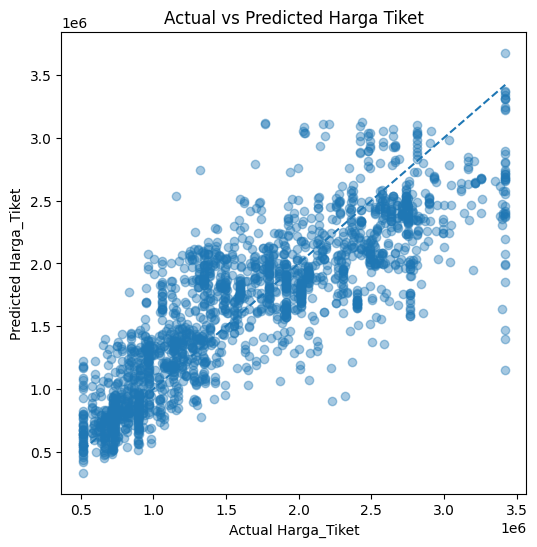

In [26]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--"
)
plt.xlabel("Actual Harga_Tiket")
plt.ylabel("Predicted Harga_Tiket")
plt.title("Actual vs Predicted Harga Tiket")
plt.show()

Sebagian besar titik berada di sekitar garis diagonal, yang menunjukkan bahwa prediksi model cukup mendekati nilai aktual. Namun, masih terdapat beberapa penyimpangan pada rentang harga ekstrem, yang mencerminkan keterbatasan model regresi linear dalam menangkap pola non-linear secara penuh.

<a id='Deployment'></a>
# Deployment
<hr>
Tahap Deployment bertujuan untuk menyimpan model machine learning yang telah dilatih dan mengimplementasikannya agar dapat digunakan kembali pada data baru atau diintegrasikan ke dalam aplikasi berbasis web. Pada proyek ini, deployment dilakukan dengan menyimpan model menggunakan joblib dan menyiapkan model untuk digunakan pada dashboard berbasis Streamlit.

## Penyimpanan Model
Model yang telah dilatih sebelumnya sudah mencakup seluruh tahapan preprocessing, seperti feature engineering, scaling, dan encoding, di dalam satu pipeline. Oleh karena itu, model dapat disimpan langsung tanpa perlu menyimpan scaler atau encoder secara terpisah.

In [27]:
joblib.dump(lr_model, "modelLinearRegression.joblib")
print("Model berhasil disimpan")

Model berhasil disimpan


Model machine learning telah berhasil disimpan dalam format .joblib dan siap digunakan kembali untuk proses prediksi maupun deployment.

## Memuat dan Menguji Model
Setelah model disimpan, dilakukan proses load model untuk memastikan bahwa model dapat digunakan kembali dengan baik pada data uji maupun data baru.

### Memuat Model

In [28]:
loaded_model = joblib.load("modelLinearRegression.joblib")
print("Model berhasil dimuat")

Model berhasil dimuat


### Pengujian Model dengan Data Uji

In [29]:
y_pred_loaded = loaded_model.predict(X_test)

for i in range(3):
    print(f"Aktual   : {y_test.iloc[i]}")
    print(f"Prediksi : {y_pred_loaded[i]}")
    print("-" * 30)

Aktual   : 2957873
Prediksi : 2035621.8508405148
------------------------------
Aktual   : 1556913
Prediksi : 2127519.0081233177
------------------------------
Aktual   : 733792
Prediksi : 771887.8026890196
------------------------------


### Pengujian Model dengan Data Baru

In [30]:
data_baru = pd.DataFrame([{
    "Maskapai": "Lion Air",
    "Tanggal_Perjalanan": "24/03/2026",
    "Waktu_Berangkat": "22:20",
    "Waktu_Tiba": "01:10 25 Mar",
    "Durasi_Penerbangan": "2h 50m",
    "Jumlah_Transit": "non-stop",
    "Informasi_Tambahan": "No info",
    "Jarak_Km": 1739.34
}])

prediksi_harga = loaded_model.predict(data_baru)[0]
print("Prediksi Harga Tiket:", prediksi_harga)

Prediksi Harga Tiket: 876992.2655668238


Model berhasil dimuat dan mampu menghasilkan prediksi yang konsisten baik pada data uji maupun pada data penerbangan baru. Hal ini menunjukkan bahwa proses penyimpanan dan pemuatan model berjalan dengan baik, serta model siap digunakan pada tahap deployment.

## Link Deployment (Streamlit)
Model prediksi harga tiket pesawat ini dirancang untuk diintegrasikan ke dalam dashboard berbasis Streamlit agar dapat digunakan secara interaktif oleh pengguna. Pada dashboard tersebut, pengguna dapat:
* Memasukkan informasi penerbangan (maskapai, tanggal, waktu, durasi, transit, dan jarak)
* Melihat hasil estimasi harga tiket secara langsung
* Menggunakan sistem sebagai alat bantu perencanaan biaya perjalanan

Dashboard Streamlit memanfaatkan model yang telah disimpan (.joblib) sehingga proses prediksi dapat dilakukan secara cepat dan konsisten tanpa perlu melatih ulang model.

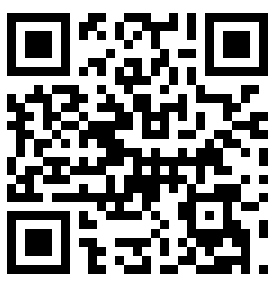

# Kesimpulan
Proyek ini berhasil membangun model prediksi harga tiket pesawat menggunakan algoritma Linear Regression dengan pendekatan CRISP-DM. Dataset diproses melalui tahapan pembersihan data, penanganan outlier, dan rekayasa fitur sehingga siap digunakan untuk pemodelan. Model yang dihasilkan menunjukkan performa yang cukup baik dengan nilai MAE sekitar 306 ribu rupiah, RMSE sekitar 407 ribu rupiah, dan R² sebesar 0,71, yang menunjukkan kemampuan model dalam merepresentasikan variasi harga tiket pesawat. Model telah berhasil disimpan, diuji kembali, dan siap diintegrasikan ke dalam dashboard berbasis Streamlit sebagai alat bantu estimasi harga tiket pesawat.

# Sumber dan Referensi

- Biswas et al. (2022). Flight Price Prediction: A Case Study (https://www.academia.edu/download/88045346/Flight_Price_Prediction_A_Case_Study.pdf).
- Verma, Pranav (2022). Flight Price Prediction (http://www.ir.juit.ac.in:8080/jspui/bitstream/123456789/3645/1/Flight%20Price%20Prediction.pdf).
- Dataset Flight Price Prediction (https://www.kaggle.com/datasets/muhammadbinimran/flight-price-prediction).
- Scikit-learn Documentation (https://scikit-learn.org/stable/)


---
Hands-On ini disusun dan digunakan sebagai bagian dari Forum Group Discussion Mata Kuliah Praktikum Unggulan (Praktikum DGX)


© 2025 - Pengelola MK Praktikum Unggulan (Praktikum DGX) Universitas Gunadarma


https://www.praktikum-hpc.gunadarma.ac.id/ <br>
https://www.hpc-hub.gunadarma.ac.id/ <br>